In [1]:
!pip install persiantools

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from persiantools.jdatetime import JalaliDate

In [53]:
df = pd.read_csv('Stores_Transactions.csv', sep=',', on_bad_lines='skip')
df=df.dropna()

In [54]:
def get_day_name(jalali_date):
    # Split the date string into year, month, and day
    year, month, day = map(int, jalali_date.split('-'))

    # Create a JalaliDate object
    date = JalaliDate(year, month, day)

    # Return the day of the week
    return date.strftime('%A')

df['day_of_week'] = df['transaction_date'].apply(get_day_name)

df['day_of_month'] = df['transaction_date'].str.split('-').str[2]

df['hour'] = df['transaction_time'].str.split(':').str[0]

df['store_id'] = df['store'].factorize()[0] + 1

df.head()

user_id  transaction_id transaction_date transaction_time  \
0        1               1       1403-01-01         23:38:58   
1        1               2       1403-01-02         16:41:29   
2        1               3       1403-01-03         07:45:32   
3        1               3       1403-01-03         07:45:32   
4        1               4       1403-01-04         15:22:12   

               store                  product_name  quantity  unit_price  \
0      Jewelry Store      Jewelry Store Product 38         1  1658456.89   
1  Electronics Store  Electronics Store Product 82         1  1462060.36   
2    Cosmetics Store    Cosmetics Store Product 26         1   105516.10   
3    Cosmetics Store    Cosmetics Store Product 17         1   217517.33   
4     Hardware Store     Hardware Store Product 40         1  1949500.13   

   total_price  total_amount  total_items    day_of_week day_of_month hour  \
0   1658456.89    1658456.89            1  Chaharshanbeh           01   23   
1   1462060.36    1462060.36            1    Panjshanbeh           02   16   
2    105516.10     323033.43            2          Jomeh           03   07   
3    217517.33     323033.43            2          Jomeh           03   07   
4   1949500.13    6191593.89            6        Shanbeh           04   15   

   store_id  
0         1  
1         2  
2         3  
3         3  
4         4

In [55]:
brief_df = df[['user_id','day_of_month', 'day_of_week','transaction_id', 'store', 'total_amount', 'total_items', 'hour', 'store_id']].drop_duplicates().reset_index()
brief_df.head()

index  user_id day_of_month    day_of_week  transaction_id  \
0      0        1           01  Chaharshanbeh               1   
1      1        1           02    Panjshanbeh               2   
2      2        1           03          Jomeh               3   
3      4        1           04        Shanbeh               4   
4      9        1           05     Yekshanbeh               5   

               store  total_amount  total_items hour  store_id  
0      Jewelry Store    1658456.89            1   23         1  
1  Electronics Store    1462060.36            1   16         2  
2    Cosmetics Store     323033.43            2   07         3  
3     Hardware Store    6191593.89            6   15         4  
4    Cosmetics Store    1184069.49            5   12         3

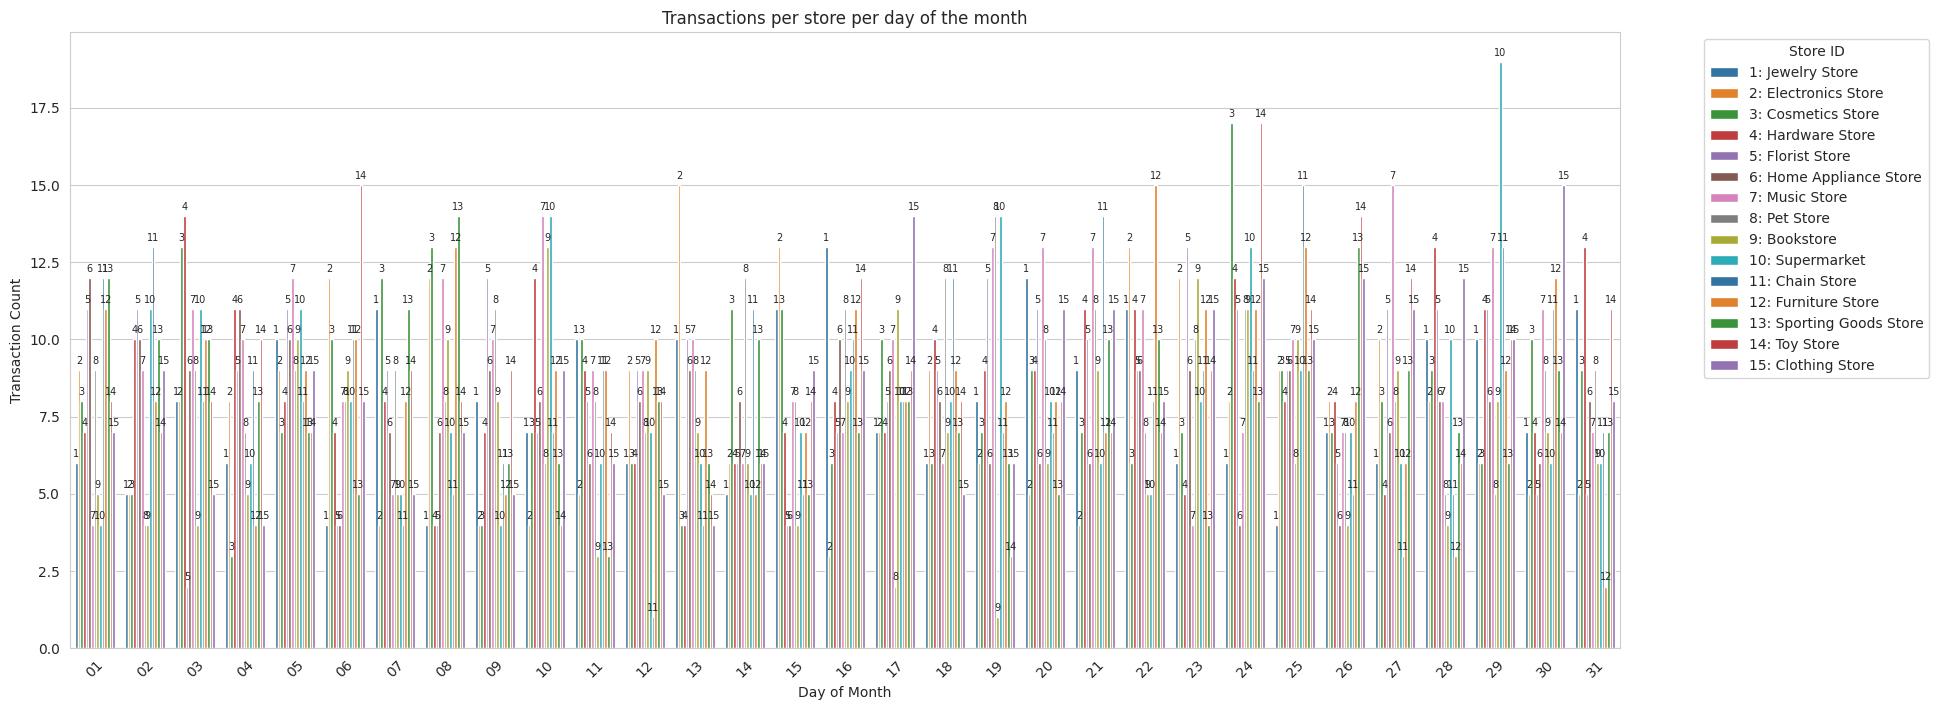

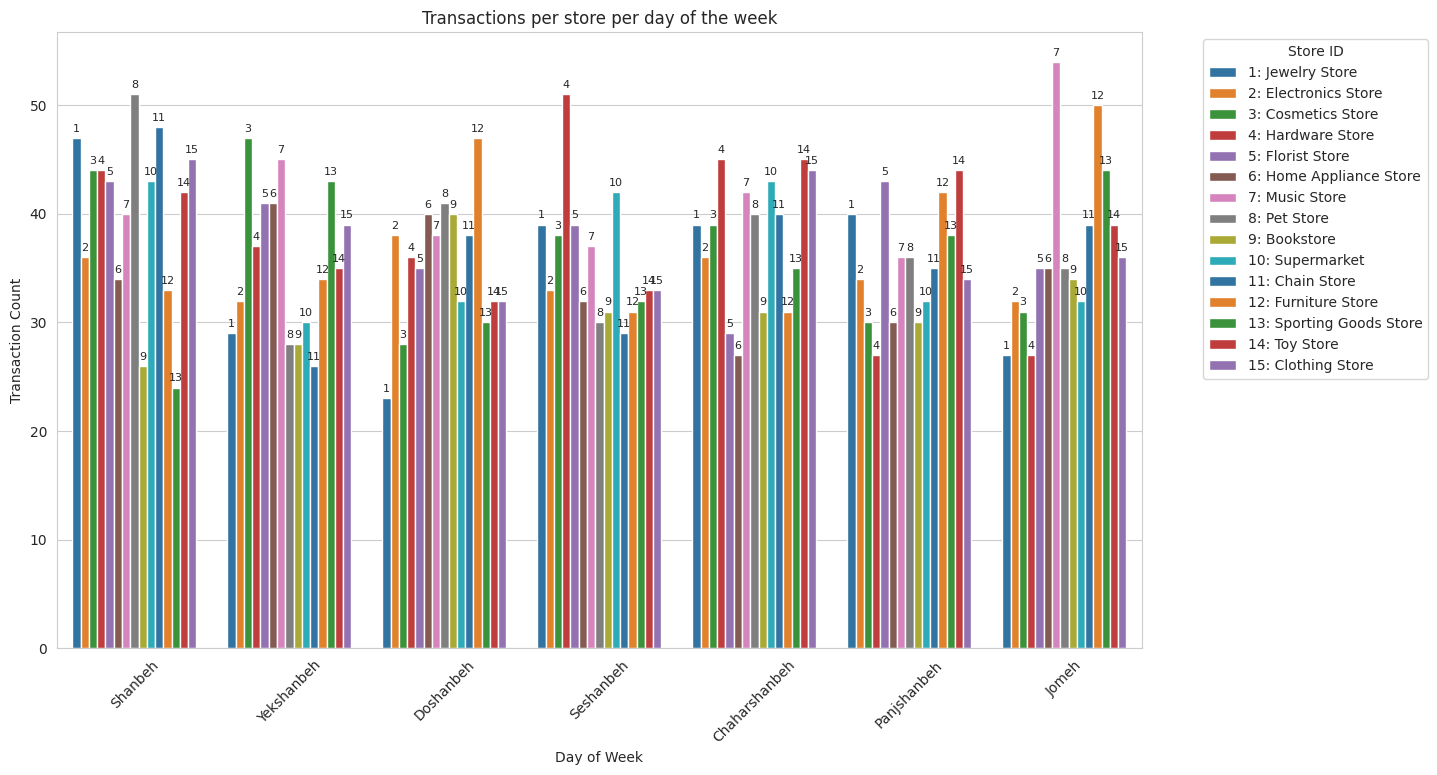

In [29]:

sns.set_style("whitegrid")

# Transactions per store per day of the month
plt.figure(figsize=(20, 8))
ax = sns.countplot(x=brief_df['day_of_month'], hue=brief_df['store_id'], order=[f'{i:02d}' for i in range(1, 32)], palette="tab10")
plt.title("Transactions per store per day of the month")
plt.xlabel("Day of Month")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="Store ID", bbox_to_anchor=(1.05, 1), loc='upper left', labels=[f"{num}: {store}" for num, store in enumerate(brief_df['store'].unique(), 1)])
for container, store_id in zip(ax.containers, brief_df['store_id'].unique()):
    ax.bar_label(container, labels=[str(store_id)]*len(container), label_type='edge', padding=3, fontsize=7)
plt.savefig('store_month.png')
plt.show()


# Transactions per store per day of the week
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=brief_df['day_of_week'], hue=brief_df['store_id'], order=['Shanbeh', 'Yekshanbeh', 'Doshanbeh', 'Seshanbeh', 'Chaharshanbeh', 'Panjshanbeh', 'Jomeh'], palette="tab10")
plt.title("Transactions per store per day of the week")
plt.xlabel("Day of Week")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="Store ID", bbox_to_anchor=(1.05, 1), loc='upper left', labels=[f"{num}: {store}" for num, store in enumerate(brief_df['store'].unique(), 1)])
for container, store_id in zip(ax.containers, brief_df['store_id'].unique()):
    ax.bar_label(container, labels=[str(store_id)]*len(container), label_type='edge', padding=3, fontsize=8)
plt.savefig('store_week.png')
plt.show()

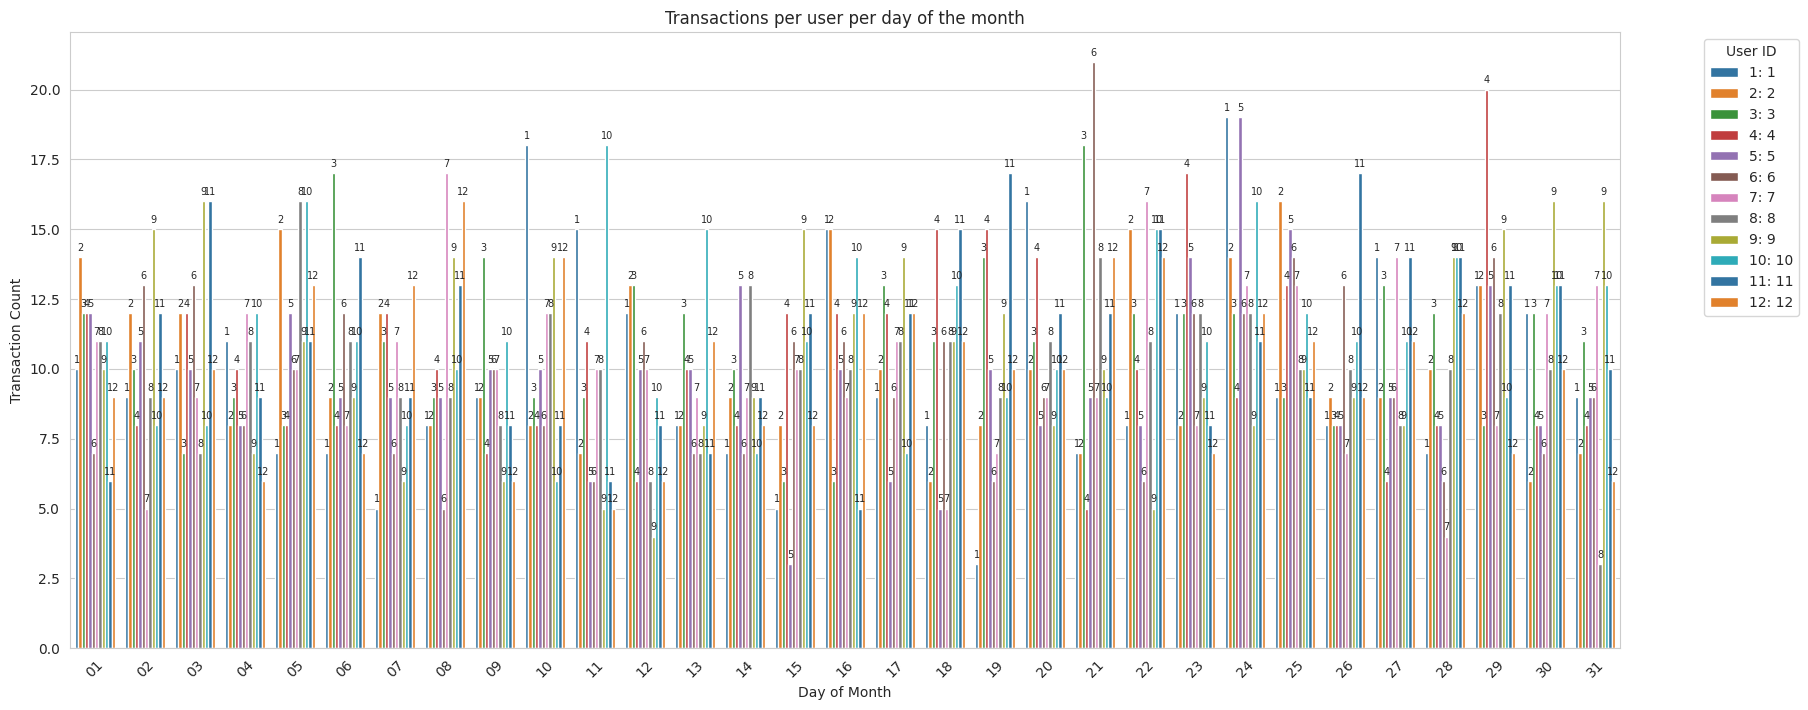

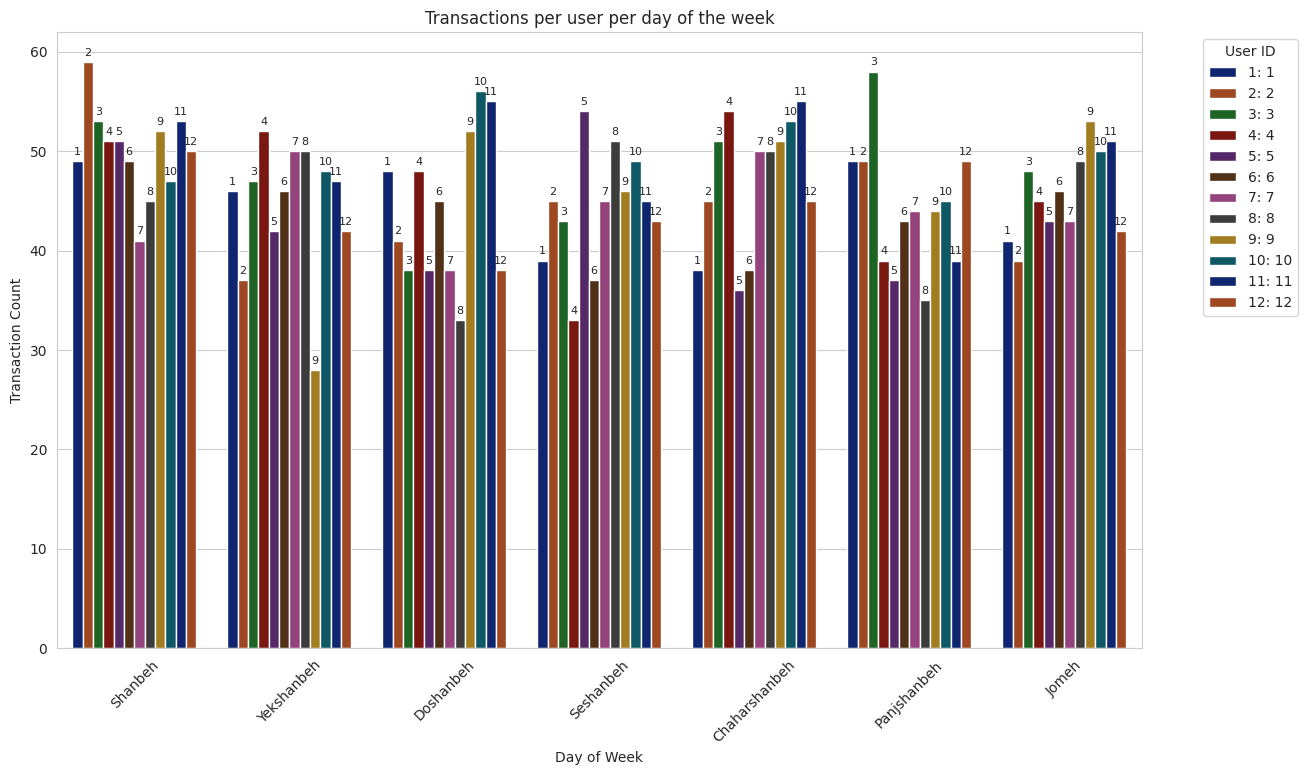

In [30]:
# Transactions per store per day of the month
plt.figure(figsize=(20, 8))
ax = sns.countplot(x=brief_df['day_of_month'], hue=brief_df['user_id'], order=[f'{i:02d}' for i in range(1, 32)], palette="tab10")
plt.title("Transactions per user per day of the month")
plt.xlabel("Day of Month")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="User ID", bbox_to_anchor=(1.05, 1), loc='upper left', labels=[f"{num}: {user}" for num, user in enumerate(brief_df['user_id'].unique(), 1)])
for container, user_id in zip(ax.containers, brief_df['user_id'].unique()):
    ax.bar_label(container, labels=[str(user_id)]*len(container), label_type='edge', padding=3, fontsize=7)
plt.savefig('User_Month.png')
plt.show()


# Transactions per store per day of the week
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=brief_df['day_of_week'], hue=brief_df['user_id'], order=['Shanbeh', 'Yekshanbeh', 'Doshanbeh', 'Seshanbeh', 'Chaharshanbeh', 'Panjshanbeh', 'Jomeh'], palette="dark")
plt.title("Transactions per user per day of the week")
plt.xlabel("Day of Week")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="User ID", bbox_to_anchor=(1.05, 1), loc='upper left', labels=[f"{num}: {user}" for num, user in enumerate(brief_df['user_id'].unique(), 1)])
for container, user_id in zip(ax.containers, brief_df['user_id'].unique()):
    ax.bar_label(container, labels=[str(user_id)]*len(container), label_type='edge', padding=3, fontsize=8)
plt.savefig('User_week.png')
plt.show()

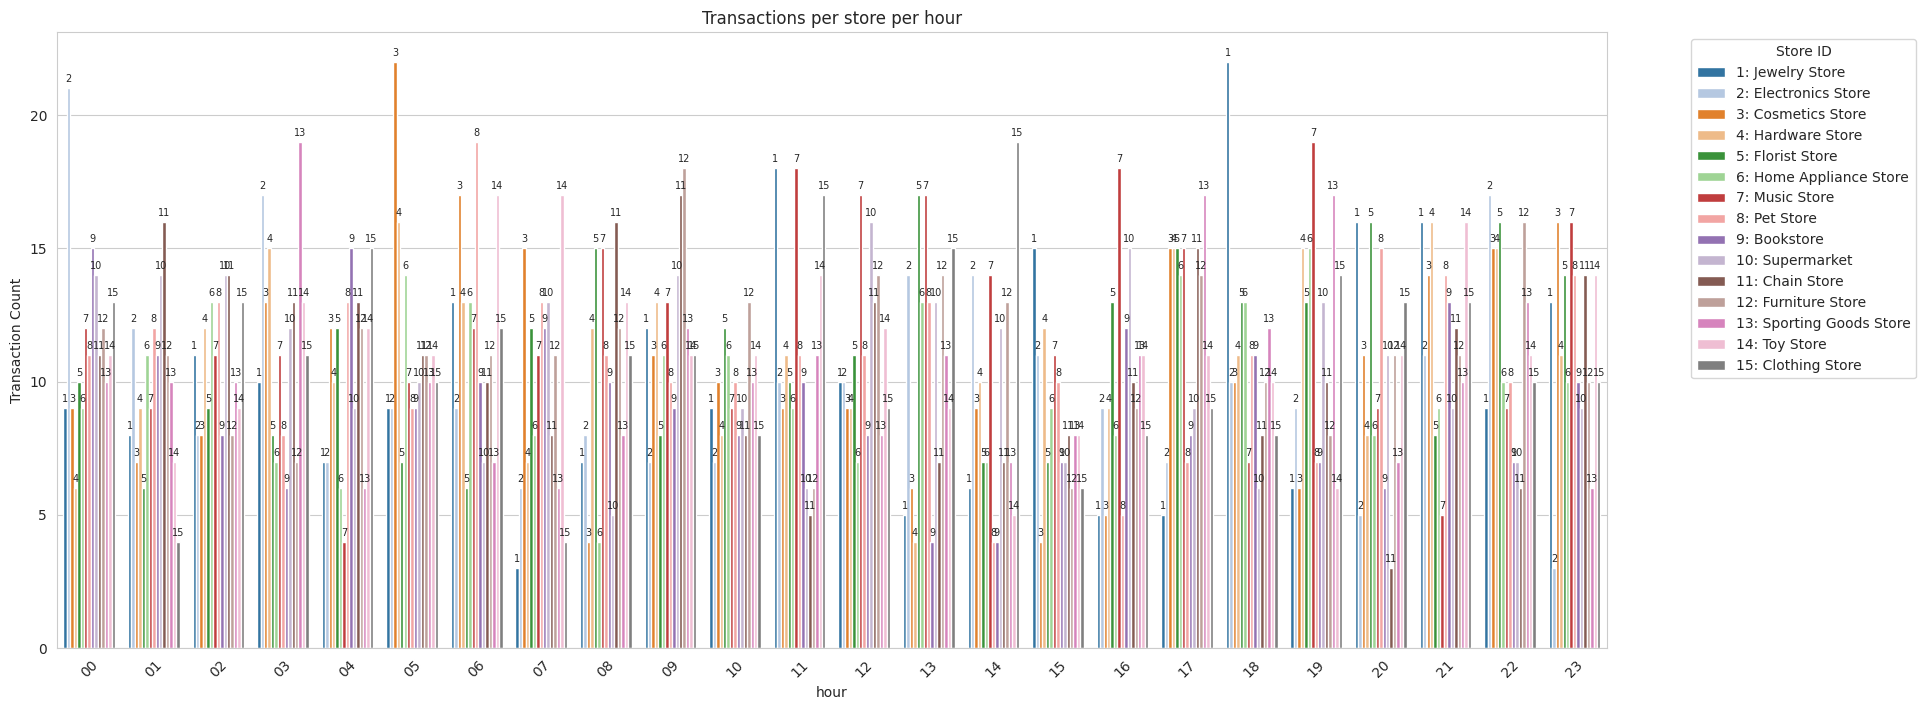

In [66]:
# Average transaction price per hour
hours_order = [f'{i:02d}' for i in range(0, 24)]
brief_df['hour'] = pd.Categorical(brief_df['hour'], categories=hours_order, ordered=True)
plt.figure(figsize=(12, 5))
sns.lineplot(x=brief_df['hour'], y=brief_df['total_amount'], estimator='mean', errorbar=None, marker='o', color='b')
plt.title("Average transaction price per hour")
plt.xlabel("Hour")
plt.ylabel("Average Price")
plt.xticks(range(24))
plt.savefig('price per hour.png')
plt.show()


# Transaction distribution by time of day
plt.figure(figsize=(12, 5))
sns.lineplot(x=brief_df['hour'], y=brief_df['transaction_id'], estimator='count', errorbar=None, marker='o', color='r')
#sns.histplot(brief_df['hour'], kde=True, color='skyblue')
plt.title("Transaction distribution by hour of the day")
plt.xlabel("Hour")
plt.ylabel("Transaction Count")
plt.xticks(range(24))
plt.savefig('Transaction per hour.png')
plt.show()

# Transactions per store per day of the month
plt.figure(figsize=(20, 8))
ax = sns.countplot(x=brief_df['hour'], hue=brief_df['store_id'], order=[f'{i:02d}' for i in range(0, 24)], palette="tab20")
plt.title("Transactions per store per hour")
plt.xlabel("hour")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="Store ID", bbox_to_anchor=(1.05, 1), loc='upper left', labels=[f"{num}: {store}" for num, store in enumerate(brief_df['store'].unique(), 1)])
for container, store_id in zip(ax.containers, brief_df['store_id'].unique()):
    ax.bar_label(container, labels=[str(store_id)]*len(container), label_type='edge', padding=3, fontsize=7)
plt.savefig('store_hour.png')
plt.show()

In [52]:
brief_df.iloc[3842]

IndexError: single positional indexer is out-of-bounds

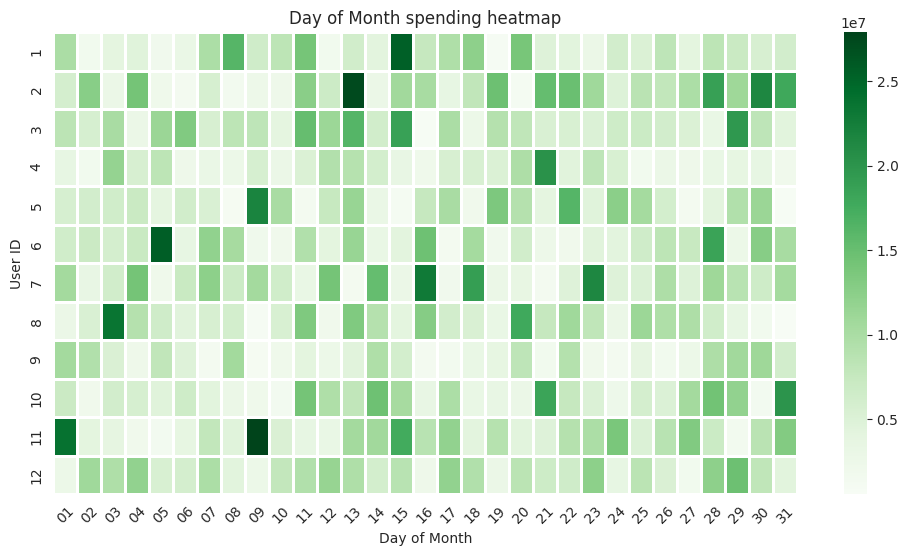

<ipython-input-36-49bd50ad932f>:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = brief_df.pivot_table(index='user_id', columns='day_of_week', values='total_amount', aggfunc='mean', fill_value=0)


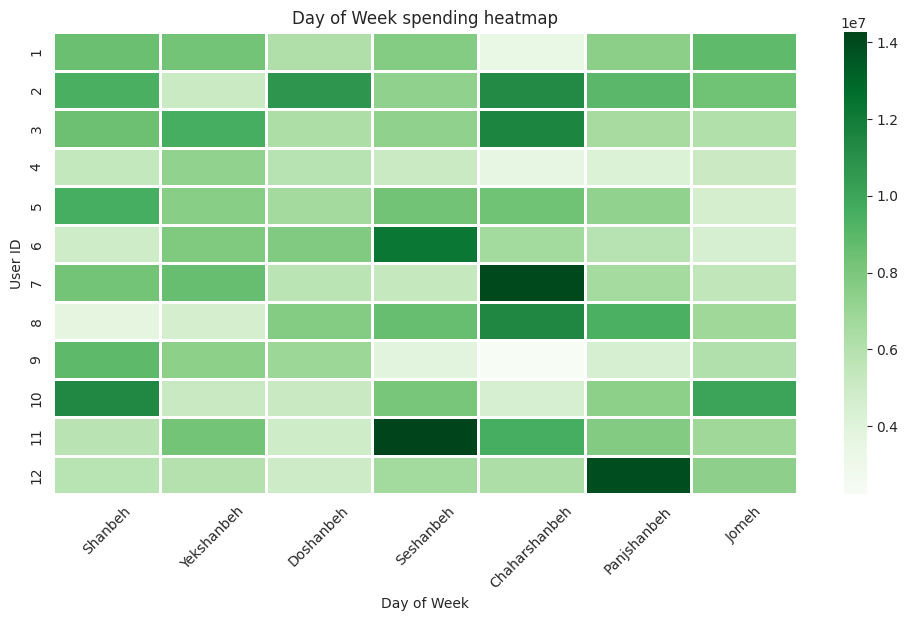

In [36]:
# Heatmap for Day of Month interactions
pivot_table = brief_df.pivot_table(index='user_id', columns='day_of_month', values='total_amount', aggfunc='mean', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, linecolor= 'white', linewidth=1, cmap='Greens')
plt.title("Day of Month spending heatmap")
plt.xlabel("Day of Month")
plt.ylabel("User ID")
plt.xticks(rotation=45)
plt.savefig('heatmap_month.png')
plt.show()

# Heatmap for Day of Week interactions
brief_df['day_of_week']=pd.Categorical(brief_df['day_of_week'], categories=['Shanbeh', 'Yekshanbeh', 'Doshanbeh', 'Seshanbeh', 'Chaharshanbeh', 'Panjshanbeh', 'Jomeh'], ordered=True)
pivot_table = brief_df.pivot_table(index='user_id', columns='day_of_week', values='total_amount', aggfunc='mean', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, linecolor= 'white', linewidth=1, cmap='Greens')
plt.title("Day of Week spending heatmap")
plt.xlabel("Day of Week")
plt.ylabel("User ID")
plt.xticks(rotation=45)
plt.savefig('heatmap_week.png')
plt.show()

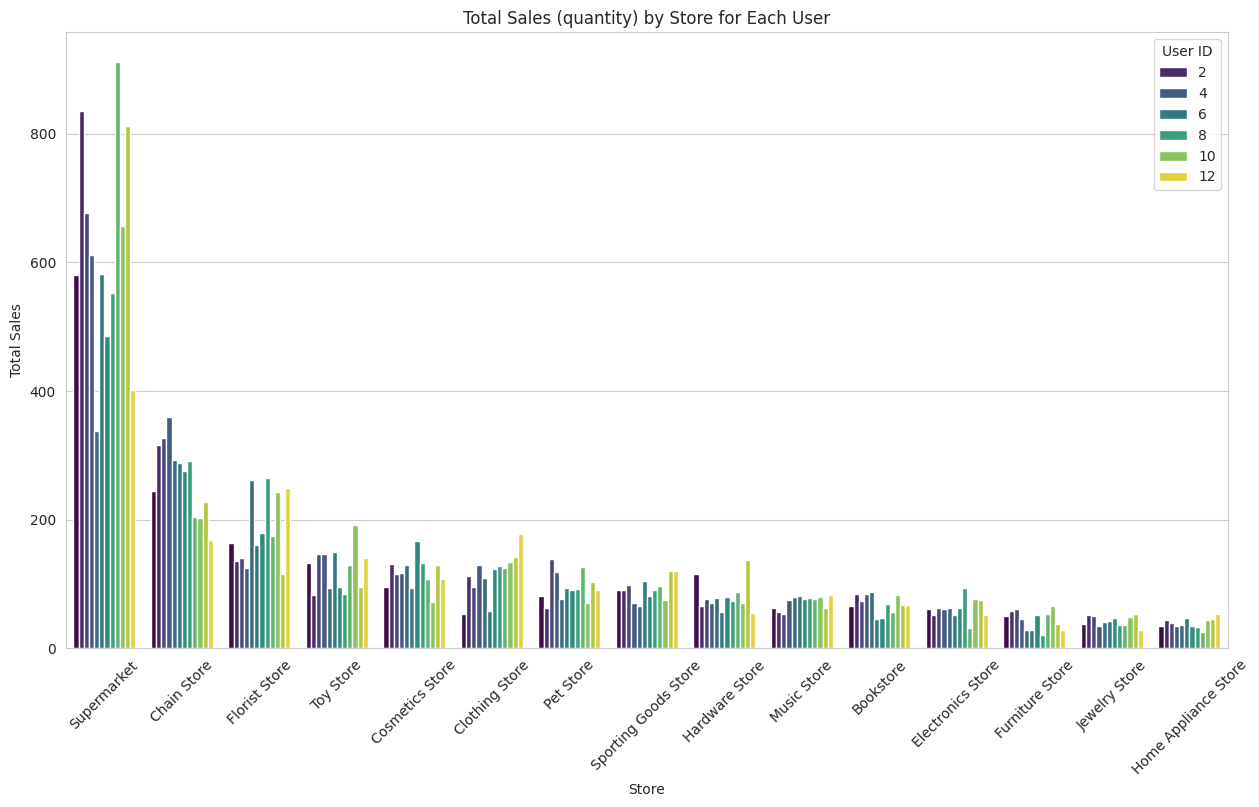

In [ ]:
# محاسبه مجموع اقلام خرید برای هر کاربر و فروشگاه
user_store_sales = brief_df.groupby(['user_id', 'store']).agg({'total_items': 'sum'}).reset_index()

# مرتب‌سازی بر اساس مجموع اقلام خرید
user_store_sales['store'] = pd.Categorical(user_store_sales['store'],
                                           categories=user_store_sales.groupby('store')['total_items'].sum().sort_values(ascending=False).index, ordered=True)

plt.figure(figsize=(15, 8))
sns.barplot(data=user_store_sales, x='store', y='total_items', hue='user_id', palette='viridis')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales (quantity) by Store for Each User')
plt.legend(title='User ID')
plt.xticks(rotation=45)
plt.savefig('quantity by Store.png')
plt.show()

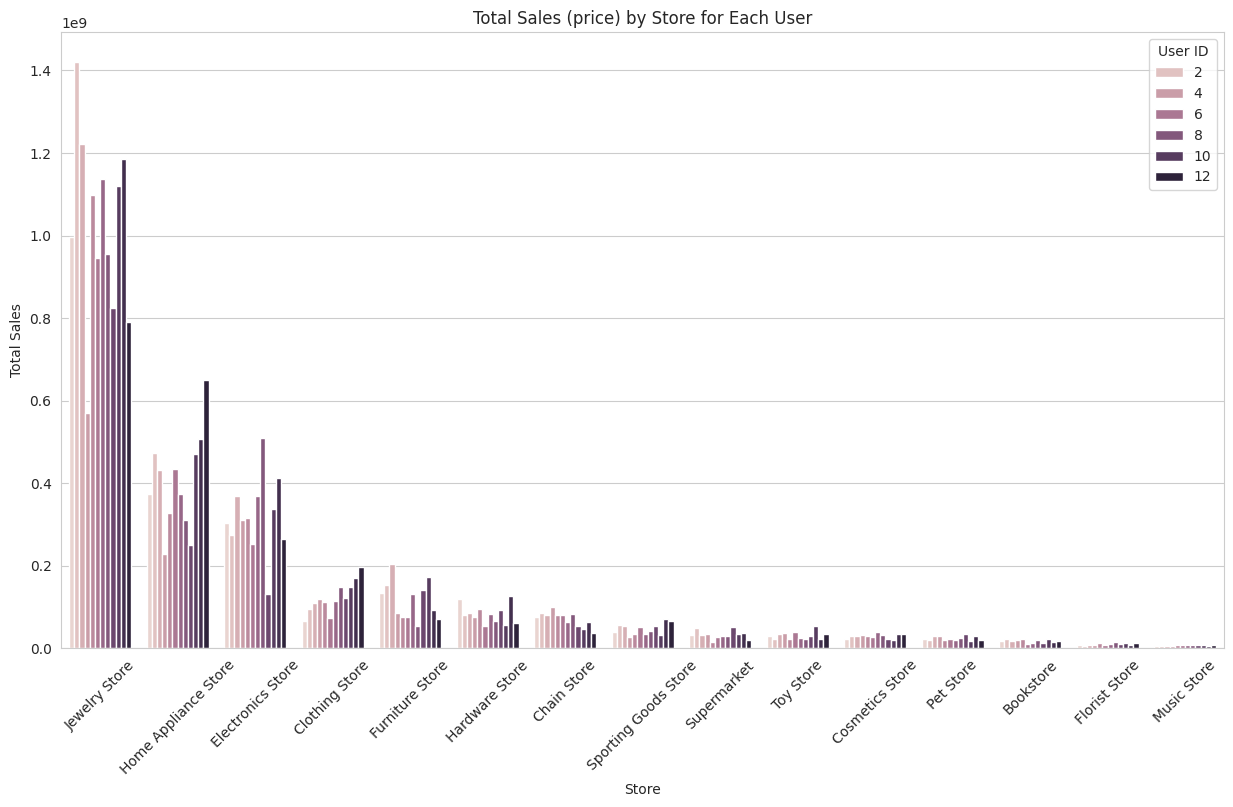

In [ ]:
# محاسبه مجموع مبلغ خرید برای هر کاربر و فروشگاه
user_store_sales = brief_df.groupby(['user_id', 'store',]).agg({'total_amount': 'sum'}).reset_index()

# مرتب‌سازی بر اساس مجموع مبلغ خرید
user_store_sales['store'] = pd.Categorical(user_store_sales['store'],
                                           categories=user_store_sales.groupby('store')['total_amount'].sum().sort_values(ascending=False).index, ordered=True)

plt.figure(figsize=(15, 8))
sns.barplot(data=user_store_sales, x='store', y='total_amount', hue='user_id', fill=True)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales (price) by Store for Each User')
plt.legend(title='User ID')
plt.xticks(rotation=45)
plt.savefig('total amount by Store.png')
plt.show()


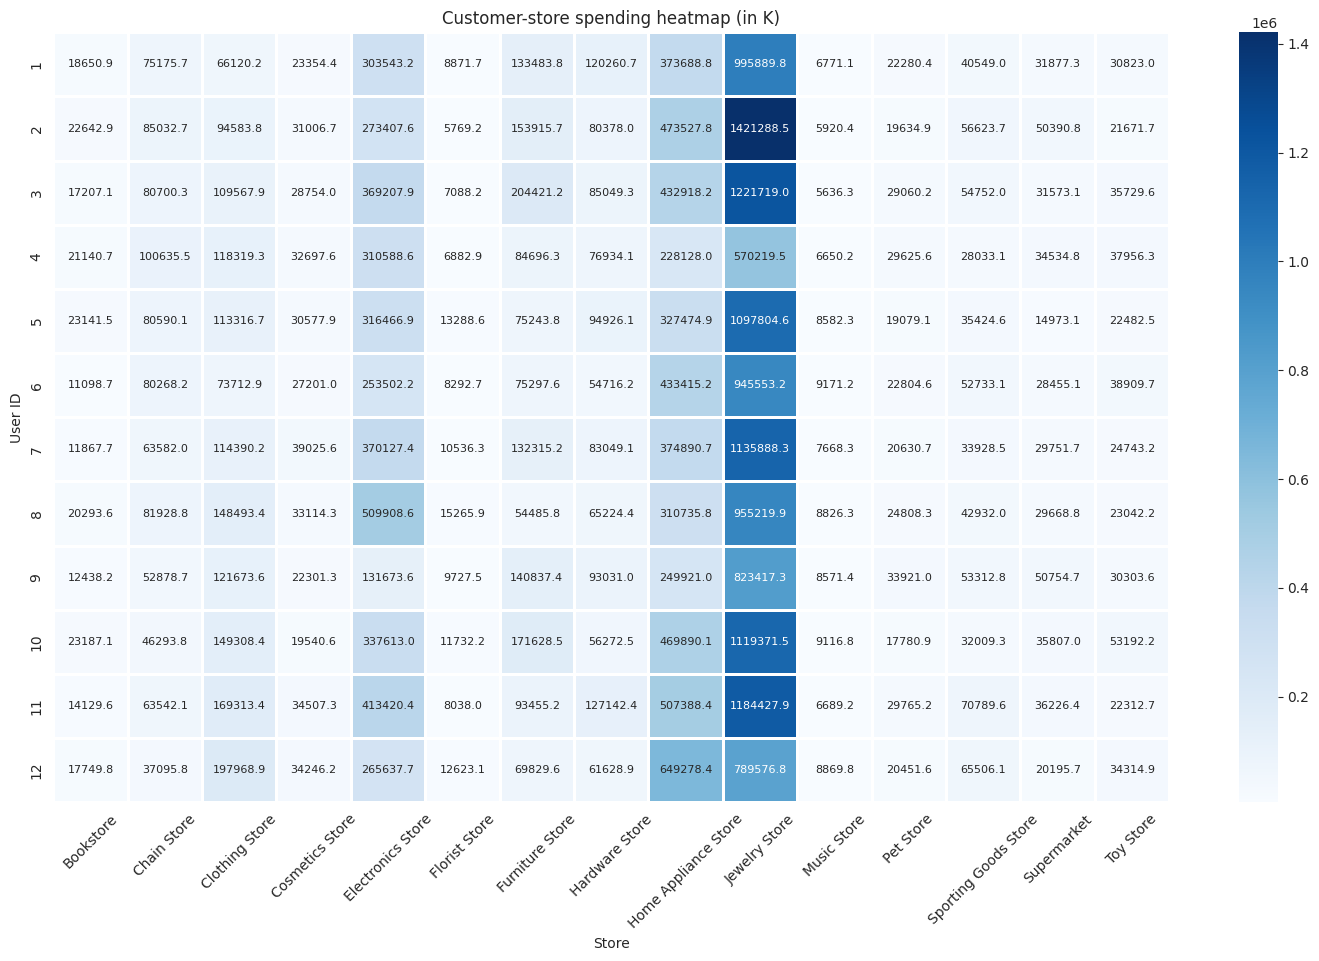

In [ ]:
# Heatmap for customer-store interactions
pivot_table = brief_df.pivot_table(index='user_id', columns='store', values='total_amount', aggfunc='sum', fill_value=0)
pivot_table_scaled = pivot_table / 1000

plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table_scaled, linecolor= 'white', linewidth=1, cmap='Blues', annot=True, fmt='.1f', annot_kws={"size": 8})
plt.title("Customer-store spending heatmap (in K)")
plt.xlabel("Store")
plt.ylabel("User ID")
plt.xticks(rotation=45)
plt.savefig('Heatmap for customer-store.png')
plt.show()

<ipython-input-184-f14785d364f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=brief_df['user_id'], y=brief_df['total_amount'], palette="magma")


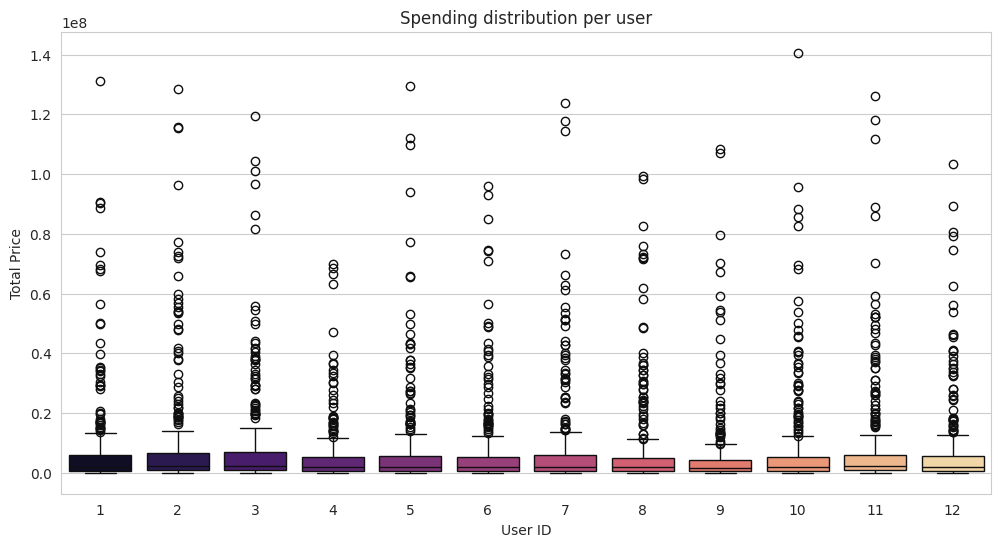

<ipython-input-184-f14785d364f8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_stats['user_id'],y=customer_stats['total_amount'], palette="magma")


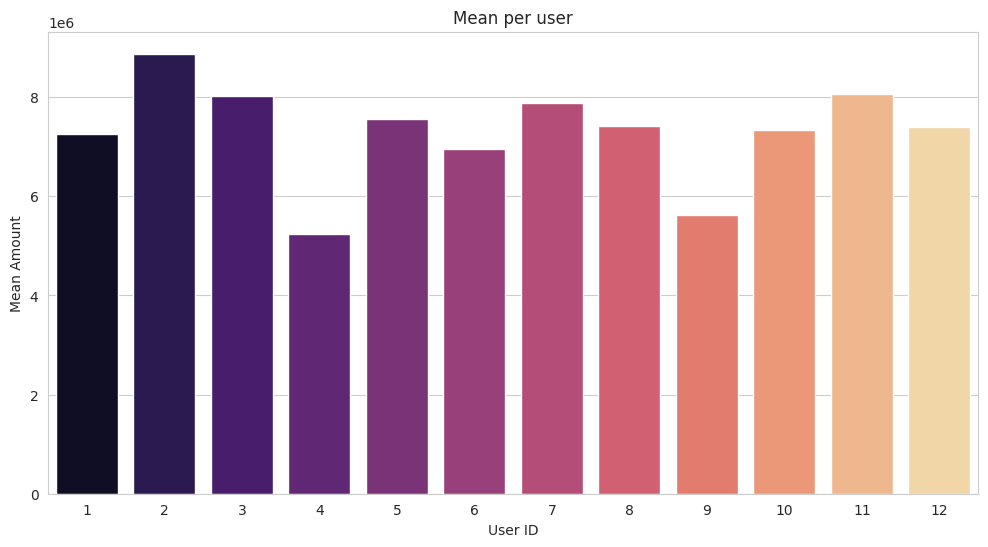

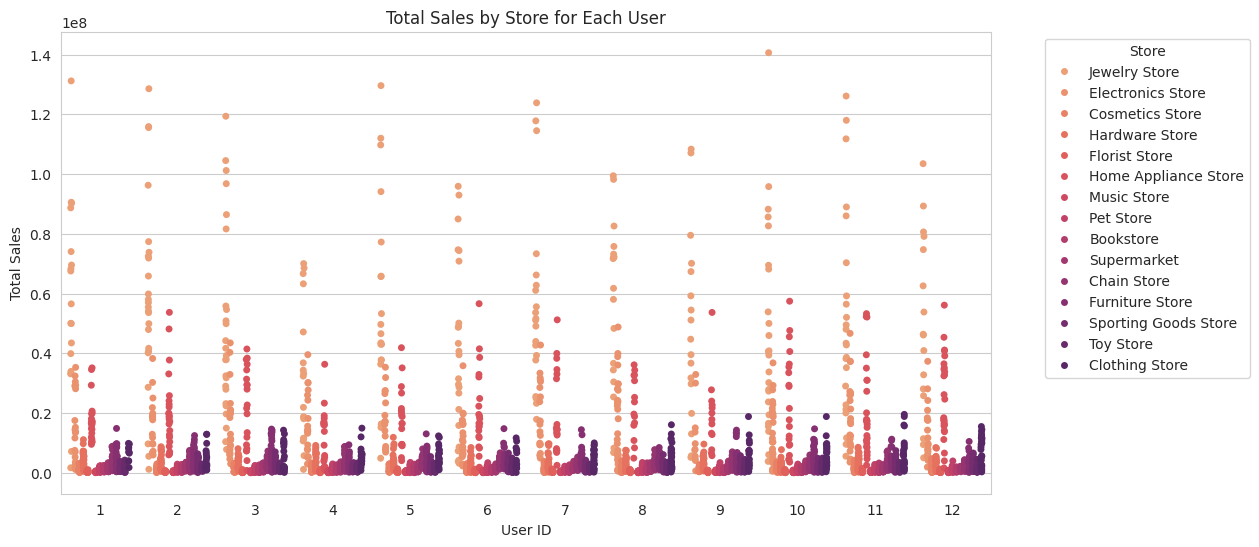

In [ ]:
# Customer spending distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=brief_df['user_id'], y=brief_df['total_amount'], palette="magma")
plt.title("Spending distribution per user")
plt.xlabel("User ID")
plt.ylabel("Total Price")
plt.savefig('U distribution.png')
plt.show()

customer_stats = brief_df.groupby(['user_id']).agg({'total_amount': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_stats['user_id'],y=customer_stats['total_amount'], palette="magma")
plt.title("Mean per user")
plt.xlabel("User ID")
plt.ylabel("Mean Amount")
plt.savefig('U Mean.png')
plt.show()

user_store_sales = brief_df.groupby(['user_id', 'store']).agg({'total_amount': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.stripplot(data=brief_df, x='user_id', y='total_amount', hue='store', palette='flare', jitter=True, dodge=True)
plt.xlabel('User ID')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store for Each User')
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('U store.png')
plt.show()

<ipython-input-186-06f232c3ed7c>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_store = product_store_sales.groupby('store').apply(lambda x: x.nlargest(n_products_per_store, 'quantity')).reset_index(drop=True)


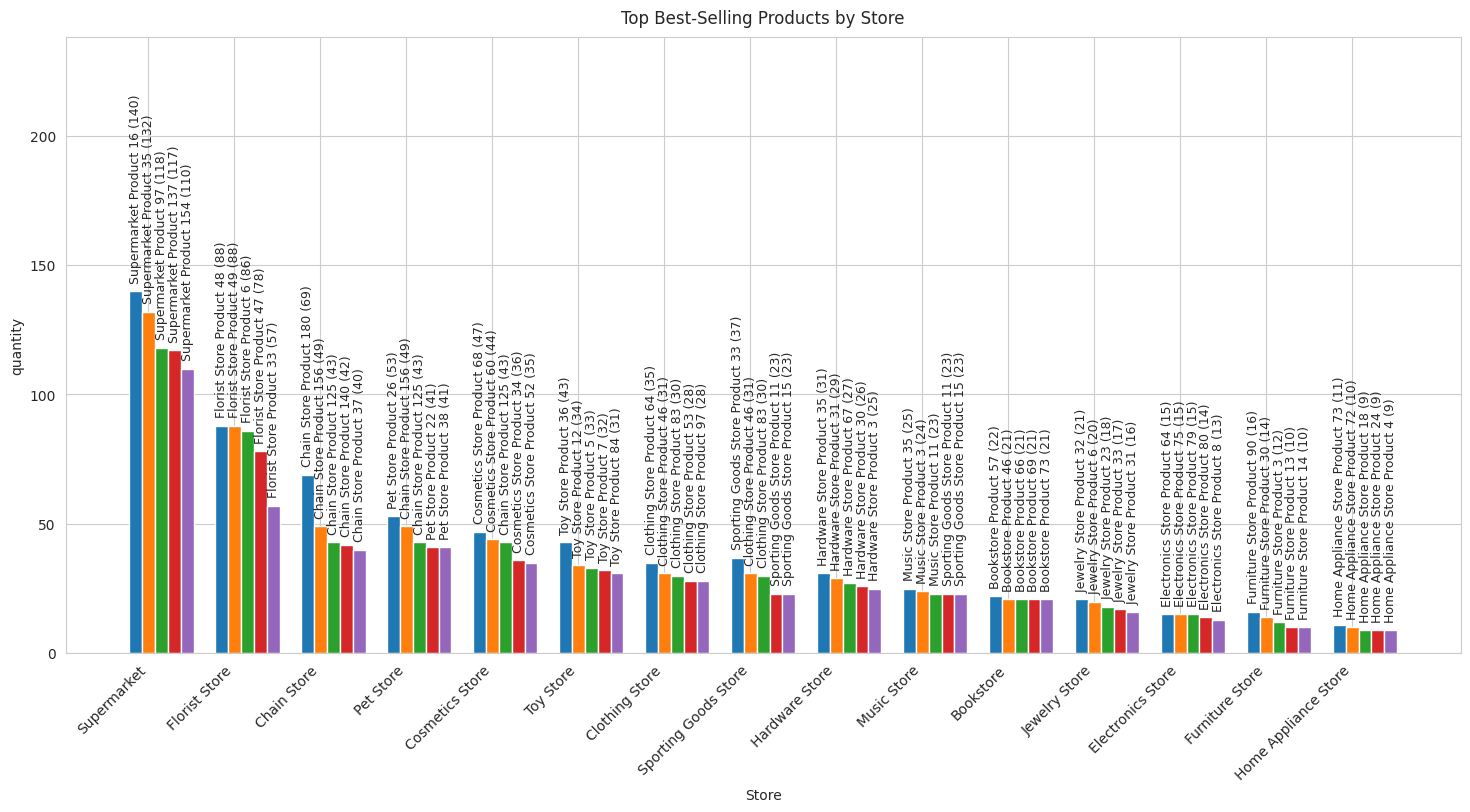

In [ ]:
product_store_sales = df.groupby(['store', 'product_name']).agg({'quantity':'sum'}).reset_index()
product_store_sales.columns = ['store', 'product_name', 'quantity']

# تعداد محصولات برای هر فروشگاه
n_products_per_store = 5
top_products_per_store = product_store_sales.groupby('store').apply(lambda x: x.nlargest(n_products_per_store, 'quantity')).reset_index(drop=True)

# محاسبه مجموع کلی فروش هر فروشگاه
total_sales_per_store = top_products_per_store.groupby('store')['quantity'].sum().reset_index()
total_sales_per_store.columns = ['store', 'total_quantity']

# افزودن ستون مجموع کلی فروش هر فروشگاه به دیتافریم اصلی
top_products_per_store = top_products_per_store.merge(total_sales_per_store, on='store', how='left')

# مرتب‌سازی فروشگاه‌ها
top_products_per_store = top_products_per_store.sort_values(by=['total_quantity', 'quantity'], ascending=[False, False])

# محاسبه تعداد منحصر به فرد فروشگاه‌ها و محصولات
n_stores = len(top_products_per_store['store'].unique())


fig, ax = plt.subplots(figsize=(18, 8))
width = 0.15

# ایجاد مختصات x برای گروه‌های میله‌ها
x = np.arange(n_stores)

for i in range(n_products_per_store):
    store_data = top_products_per_store.groupby('store').nth(i)

    # رسم میله‌ها
    bars = ax.bar(x + (i - 1) * width,
                  store_data['quantity'],
                  width,
                  label=f'Product {i+1}')

    # اضافه کردن برچسب‌های بالای هر میله
    for bar in bars:
        height = bar.get_height()
        product_name = store_data.loc[store_data['quantity'] == height, 'product_name'].iloc[0]
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'  {product_name} ({int(height)})',
                ha='center', va='bottom', rotation=90, fontsize=9)

# تنظیمات محور x
ax.set_xticks(x)
ax.set_xticklabels(store_data['store'], rotation=45, ha='right')
plt.ylim(0, top_products_per_store['quantity'].max() * 1.7)
plt.xlabel('Store')
plt.ylabel('quantity')
plt.title('Top Best-Selling Products by Store', pad=10)
plt.savefig('Top Best-Selling Products.png')
plt.show()